# test-11

LogCircular 1:100 -B GO (FLUX)

This means new mesh -B, coarser and more uniform shapes in cells

New refinement techniques

15 Jan 2024

### config-1

GridRefinement::refine_and_coarsen_fixed_fraction(*this->triangulation,
                                                          error_indicators,
                                                          0.80,
                                                          0.02);

    cycle   cells    DoFs     ex POINT err               L2               H1  \
0       0     252     270 5.1270882559e+01 1.8582515005e+00 3.2709390661e+03   
1       1     300     335 5.1894471014e+01 1.8538374105e+00 3.1621606366e+03   
2       2     402     471 5.2331793829e+01 1.8513967777e+00 3.1263115798e+03   
3       3     678     819 4.8239077475e+01 1.8917446901e+00 2.9978033689e+03   
4       4    1356    1637 3.2409041324e+01 2.3567523882e+00 2.4996336332e+03   
5       5    2376    2876 6.2867567651e+00 4.7711046222e-01 1.5890531884e+03   
6       6    5103    6302 3.8329977050e+00 5.1106237134e-01 1.3690102597e+03   
7       7    8820   10559 2.9098576606e+00 1.2420228235e-01 8.3391167769e+02   
8       8   17781   21662 2.1063905288e+00 1.2312422378e-01 7.2132364586e+02   
9       9   30891   36252 9.5296965908e-01 3.2197409326e-02 4.2741624057e+02   
10     10   54810   66084 6.0206608278e-02 3.6068055905e-02 3.9219789221e+02   
11     11   97065  117898 6.2220368176e-

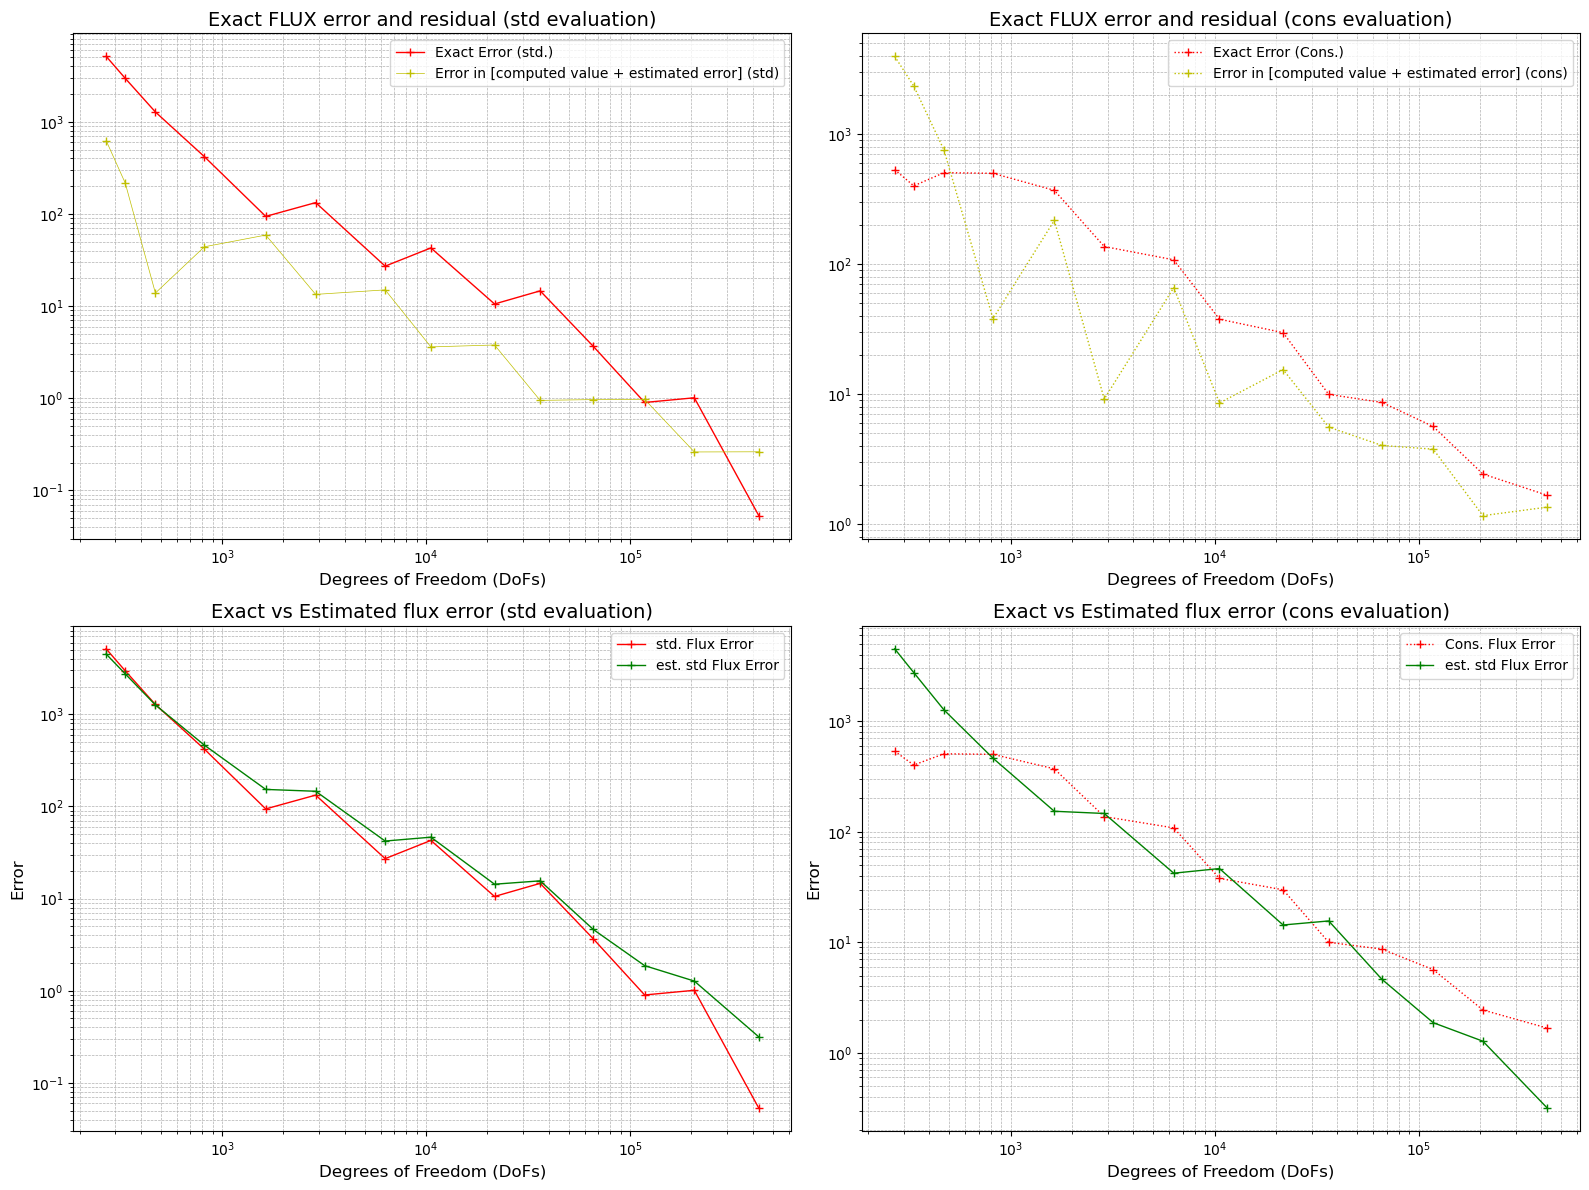

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
file_name = "./results/convergence_results.csv"
data = pd.read_csv(file_name)

# Compute 1/N (1/DoFs)
#data['1/N'] = 1 / data['DoFs']
pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
print(data)

# Create the figure
plt.figure(figsize=(16, 12))  # Adjust the figure size for two plots

# Plot 1: Original log-log plot
plt.subplot(2, 2, 1)  # First subplot (top)
plt.loglog(data['DoFs'], data['std FLUX err'], "r-+", linewidth=1.0, label='Exact Error (std.)')
plt.loglog(data['DoFs'], abs(data['std FLUX err']-data["est err"]),"y-+", linewidth=0.5, label='Error in [computed value + estimated error] (std)')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.title('Exact FLUX error and residual (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 3)  # Second subplot (bottom)
plt.loglog(data['DoFs'], data['std FLUX err'],"r-+", linewidth=1.0, label='std. Flux Error')
plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=1.0, label='est. std Flux Error')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Exact vs Estimated flux error (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 2)  # First subplot (top)
plt.loglog(data['DoFs'], data['Cons. FLUX err'], "r:+", linewidth=1.0, label='Exact Error (Cons.)')
plt.loglog(data['DoFs'], abs(data['Cons. FLUX err']-data["est err"]),"y:+", linewidth=1.0, label='Error in [computed value + estimated error] (cons)')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.title('Exact FLUX error and residual (cons evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 4)  # Second subplot (bottom)
plt.loglog(data['DoFs'], data['Cons. FLUX err'],"r:+", linewidth=1.0, label='Cons. Flux Error')
plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=1.0, label='est. std Flux Error')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Exact vs Estimated flux error (cons evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


### config-2


GridRefinement::refine_and_coarsen_optimize(*this->triangulation,
                                                        error_indicators,
                                                        2);


    cycle    cells     DoFs     ex POINT err               L2  \
0       0      532      570 5.0396042654e+00 8.4781713549e-02   
1       1      646      722 7.6790392269e+00 8.6591353260e-02   
2       2      874     1026 8.5856845241e+00 8.7994747228e-02   
3       3     1330     1634 8.8479432462e+00 8.8461971137e-02   
4       4     3724     4332 3.1863445181e+00 2.2992855391e-02   
5       5     5548     6764 3.2044809852e+00 2.3035320250e-02   
6       6    15352    17784 1.1676900192e+00 5.8887686387e-03   
7       7    22648    27512 1.1688520056e+00 5.8918093210e-03   
8       8    62320    72048 4.2955993684e-01 1.4909599297e-03   
9       9    91504   110960 4.2963300810e-01 1.4911611213e-03   
10     10   251104   290016 1.4309963841e-01 3.7517083052e-04   
11     11   367840   445664 1.4310421230e-01 3.7518373534e-04   
12     12  1008064  1163712 2.2668311447e-02 9.4102271978e-05   

                 H1     std FLUX err          est err   Cons. FLUX err  
0  2.2412535305e

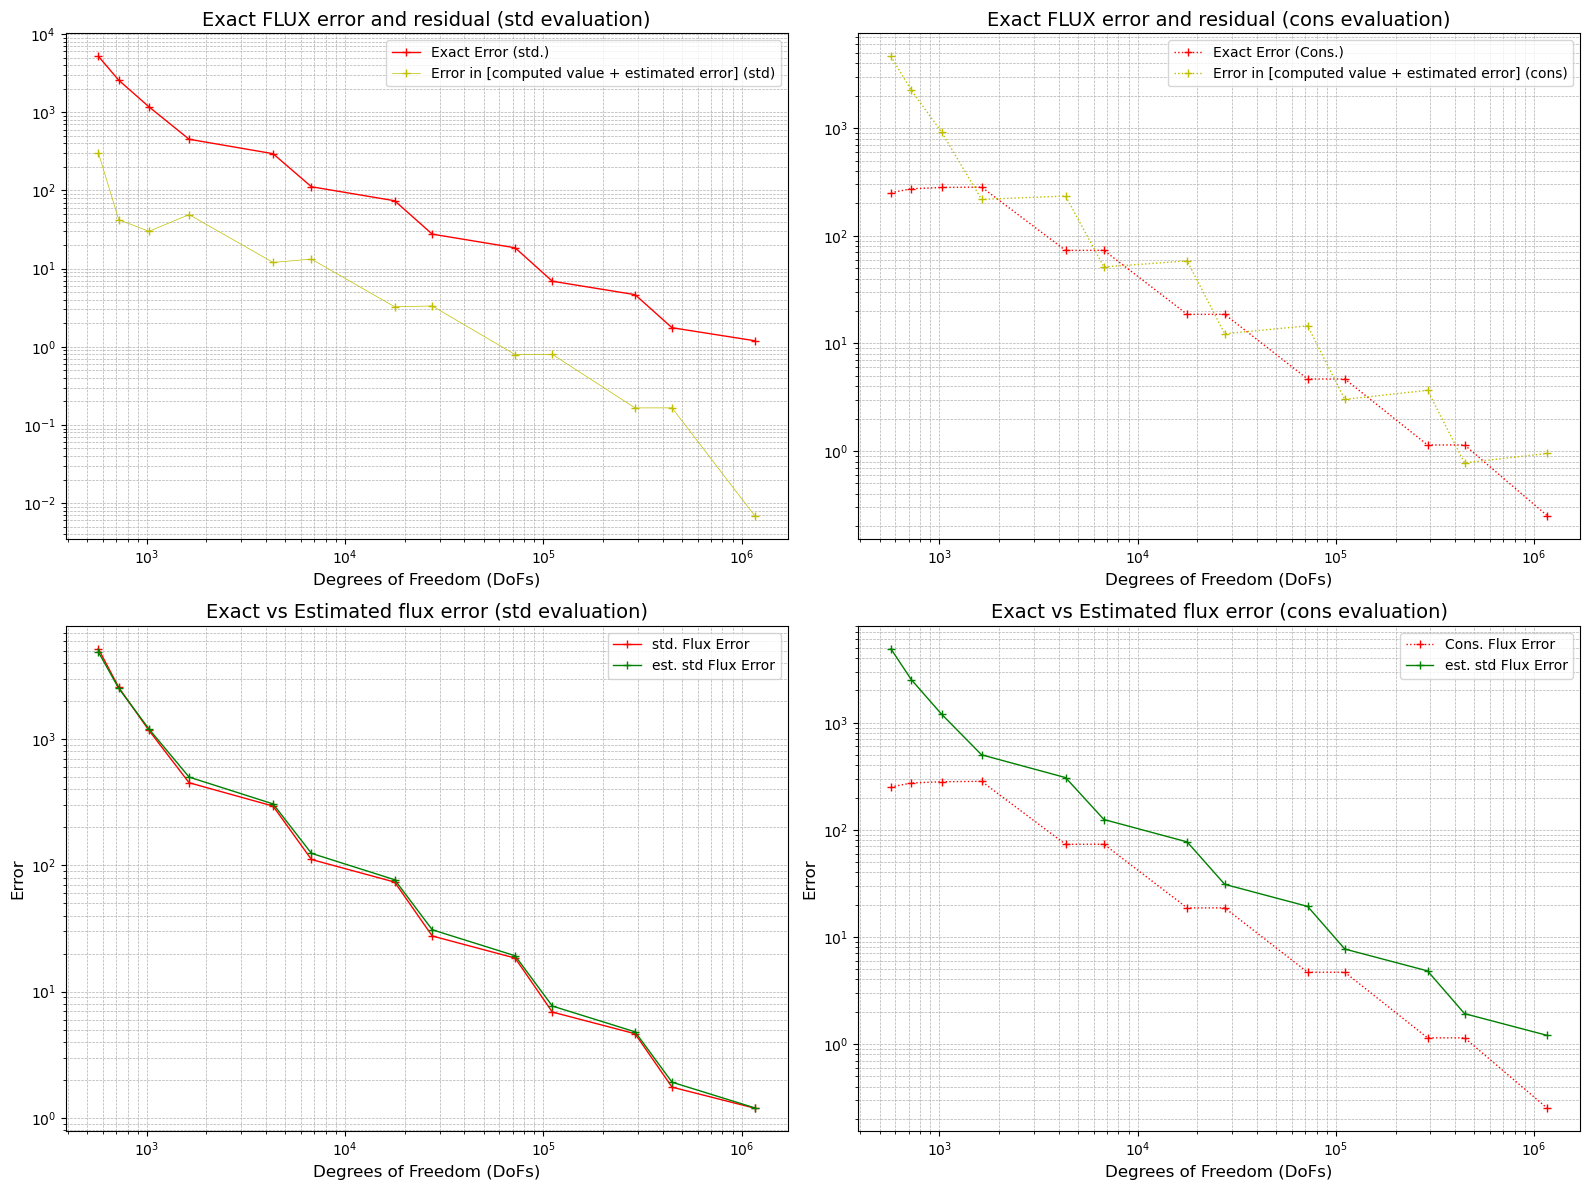

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
file_name = "./results/convergence_results.csv"
data = pd.read_csv(file_name)

# Compute 1/N (1/DoFs)
#data['1/N'] = 1 / data['DoFs']
pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
print(data)

# Create the figure
plt.figure(figsize=(16, 12))  # Adjust the figure size for two plots

# Plot 1: Original log-log plot
plt.subplot(2, 2, 1)  # First subplot (top)
plt.loglog(data['DoFs'], data['std FLUX err'], "r-+", linewidth=1.0, label='Exact Error (std.)')
plt.loglog(data['DoFs'], abs(data['std FLUX err']-data["est err"]),"y-+", linewidth=0.5, label='Error in [computed value + estimated error] (std)')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.title('Exact FLUX error and residual (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 3)  # Second subplot (bottom)
plt.loglog(data['DoFs'], data['std FLUX err'],"r-+", linewidth=1.0, label='std. Flux Error')
plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=1.0, label='est. std Flux Error')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Exact vs Estimated flux error (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 2)  # First subplot (top)
plt.loglog(data['DoFs'], data['Cons. FLUX err'], "r:+", linewidth=1.0, label='Exact Error (Cons.)')
plt.loglog(data['DoFs'], abs(data['Cons. FLUX err']-data["est err"]),"y:+", linewidth=1.0, label='Error in [computed value + estimated error] (cons)')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.title('Exact FLUX error and residual (cons evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 4)  # Second subplot (bottom)
plt.loglog(data['DoFs'], data['Cons. FLUX err'],"r:+", linewidth=1.0, label='Cons. Flux Error')
plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=1.0, label='est. std Flux Error')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Exact vs Estimated flux error (cons evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
